# Pandas

In [316]:
import numpy as np
import pandas as pd
import matplotlib

### Series

In [4]:
#Argumentos: listas / vetores
#Series criam index automaticamente

serie_inicial = pd.Series(np.random.randn(5))

print(serie_inicial)

serie_inicial_index_definido = pd.Series(np.random.randn(5), index= ["A", "B", "C", "D", "E"])
print(serie_inicial_index_definido)

serie_lista = pd.Series(["Python", "SQL", "VBA"])
print(serie_lista)

0    0.654744
1    0.071571
2   -0.468718
3    0.434180
4   -0.181013
dtype: float64
A    1.386014
B   -0.752488
C    0.952790
D   -0.423664
E    0.330658
dtype: float64
0    Python
1       SQL
2       VBA
dtype: object


In [10]:
#A partir de dicionarios, criando series temporais

dicionario_cotacoes = {"WEG3": 20.20, "PETR4": 19.28, "VALE3": 64.90, "PETZ3": 12.03}

series_cotacoes = pd.Series(dicionario_cotacoes)

print(series_cotacoes)

print(series_cotacoes['WEG3'])
#print(series_cotacoes[0]) #depreciado
print(series_cotacoes.iloc[0])

WEG3     20.20
PETR4    19.28
VALE3    64.90
PETZ3    12.03
dtype: float64
20.2
20.2


### DataFrames

In [15]:
#A partir de outras séries ou dicionarios

dicionario_dados = {
    "empresas": pd.Series(["Wege", "Vale", "Petro"], index = ["2019", "2020", "2021"]),
    "price": pd.Series([20, 30, 40], index = ["2019", "2020", "2021"]),
    "volume": pd.Series([1000, 4000, 7500], index = ["2019", "2020", "2021"]),
}

dados_diarios = pd.DataFrame(dicionario_dados)

dados_diarios

,empresas,price,volume
2019,Wege,20,1000
2020,Vale,30,4000
2021,Petro,40,7500


In [16]:
dicionario_dados = {
    "empresas": ["Wege", "Vale", "Petro"],
    "price": [20, 30, 40],
    "volume": [1000, 4000, 7500]
}

dados_diarios_from_dict = pd.DataFrame(dicionario_dados, index=["2019", "2020", "2021"])
dados_diarios_from_dict

,empresas,price,volume
2019,Wege,20,1000
2020,Vale,30,4000
2021,Petro,40,7500


In [18]:
#Escolhendo colunas

dicionario_dados = {
    "empresas": ["Wege", "Vale", "Petro"],
    "price": [20, 30, 40],
    "volume": [1000, 4000, 7500]
} 

dados_diarios_from_dict = pd.DataFrame(
    dicionario_dados,
    index= ["2019", "2020", "2021"],
    columns = ["volume", "price", "empresas", "novaColl"])

dados_diarios_from_dict

,volume,price,empresas,novaColl
2019,1000,20,Wege,NaN
2020,4000,30,Vale,NaN
2021,7500,40,Petro,NaN


In [25]:
#Cuidado
dado = {"cotacao": 20, "dia": "2019-12-12"}

#datraframe = pd.DataFrame(dado)
#ValueError: If using all scalar values, you must pass an index

datraframe = pd.DataFrame(dado, index= [0])

datraframe

,cotacao,dia
0,20,2019-12-12


### Desafios


In [33]:
serie_numero = pd.Series(np.random.randint(0, 10, 10))
serie_numero

0    5
1    2
2    1
3    8
4    7
5    4
6    8
7    9
8    7
9    8
dtype: int32

In [35]:
acao_inicial = float(input('Digite o valor inicial de uma acao: '))
acao_inicial

40.0

In [345]:
import random
dado = {"cotacao": acao_inicial, "dia": 0}
data_cotacoes_30 = pd.DataFrame(dado, index= [0])

for i in range(500):
    volatilidade_diaria = 0.04

    valor_ultimo_dia = data_cotacoes_30.loc[len(data_cotacoes_30) - 1, "cotacao"]
    valor_novo_dia = valor_ultimo_dia * (1 + np.random.normal(0, volatilidade_diaria))
    valor_novo_dia = round(valor_novo_dia, 4)

    #extra

    novo_registro = {"cotacao": valor_novo_dia, "dia": len(data_cotacoes_30)}
    data_cotacoes_30 = pd.concat([data_cotacoes_30, pd.DataFrame(novo_registro, index= [i+1])])

data_cotacoes_30

,cotacao,dia
0,40.0000,0
1,38.9194,1
2,36.1582,2
3,36.1730,3
4,36.0694,4
...,...,...
496,9.0336,496
497,9.0090,497
498,8.6935,498
499,8.6757,499


<Axes: >

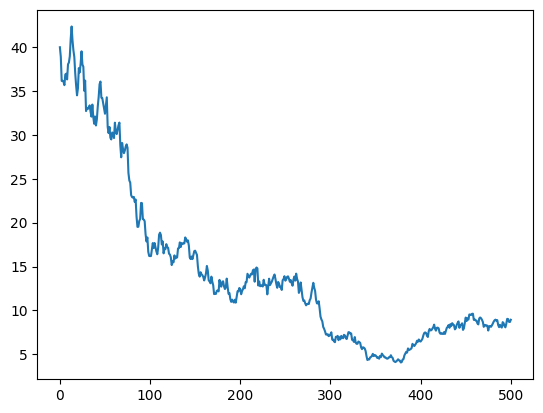

In [346]:

lista_cotacoes = []
lista_dias = []
for dia, cotacao in enumerate(data_cotacoes_30['cotacao']):
    lista_cotacoes.append(cotacao)
    lista_dias.append(dia)

# print(lista_cotacoes)
# print(lista_dias)

serie_cotacoes = pd.Series(data=lista_cotacoes, index= lista_dias )
serie_cotacoes.plot()

In [293]:
np.random.normal(0, volatilidade_diaria)

-0.06714596859530005

In [347]:
dict_desafio = {
    "tickers" : ["WEGE3", "PETR3", "VALE3", "PETR4", "LREN3"],
    "cotacoes": [20, 30, 40, 12, 35],
    "nomes": ['Weg', 'Petro', 'Vale', 'Petro', 'Lojas Renner'],
    "preco_sobre_lucro": [25, 6, 12, 7, 25],
    "volume": [5000, 1000, 4000, 7000, 1200]
    }

dataframe_desafio = pd.DataFrame(dict_desafio, index= [1, 2, 3, 4, 5])
dataframe_desafio


,tickers,cotacoes,nomes,preco_sobre_lucro,volume
1,WEGE3,20,Weg,25,5000
2,PETR3,30,Petro,6,1000
3,VALE3,40,Vale,12,4000
4,PETR4,12,Petro,7,7000
5,LREN3,35,Lojas Renner,25,1200


In [201]:
dataframe_desafio = pd.DataFrame(
    dict_desafio, 
    index= [1, 2, 3, 4, 5], 
    columns= ["nomes", "tickers", "preco_sobre_lucro", "volume", "cotacoes"]
    )
dataframe_desafio

,nomes,tickers,preco_sobre_lucro,volume,cotacoes
1,Weg,WEGE3,25,5000,20
2,Petro,PETR3,6,1000,30
3,Vale,VALE3,12,4000,40
4,Petro,PETR4,7,7000,12
5,Lojas Renner,LREN3,25,1200,35
